#  Impoprting libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix, precision_score, recall_score, roc_auc_score,roc_curve

In [3]:
df = pd.read_csv('heart.csv')
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Data Analysis 

In [4]:
df.shape  # it shows the no.of rows and columns in our data


(1025, 14)

In [5]:
df.size # it shows the total no.of entries in our data


14350

In [6]:
df.duplicated() # shows the boolean values for the duplicated(TRUE) and non_duplicated rows(FALSE)


0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [7]:
#since the duplicated rows are no use for us 
#we can drop these duplicated datas
df = df.drop_duplicates()

In [8]:
df.size


4228

In [9]:
df.shape


(302, 14)

In [10]:
df.isnull()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,False,False,False,False,False,False,False,False,False,False,False,False,False,False
733,False,False,False,False,False,False,False,False,False,False,False,False,False,False
739,False,False,False,False,False,False,False,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [13]:
df.describe() #to get the overall statistical information of the dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


a = df.corr() 
a #to find the correlation within the dataset

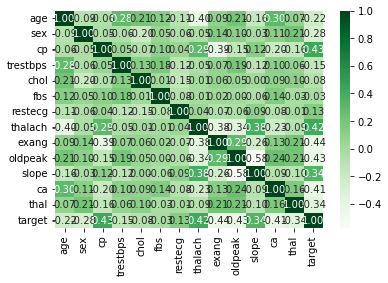

In [15]:
sns.heatmap(a,cbar = True,annot = True, fmt = ".2f",cmap ="Greens")
plt.show()

# Data Visualization

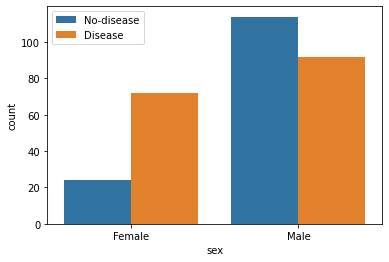

In [72]:
# to visualize the no.of persons wrt  target ad sex
sns.countplot(x ='sex', hue ="target", data = df)
plt.legend(labels = ["No-disease",'Disease'])
plt.xticks([0,1],["Female",'Male'])     
plt.show()

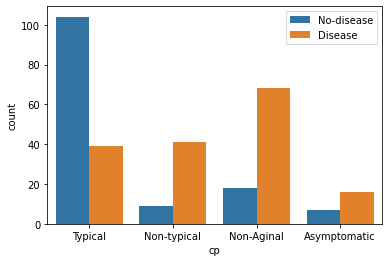

In [73]:
#to visualize the no.of cp_cases wrt target
sns.countplot(x = 'cp',hue ='target' ,data =df)
plt.legend(labels = ["No-disease",'Disease'])
plt.xticks([0,1,2,3],['Typical','Non-typical','Non-Aginal','Asymptomatic'])
plt.show()

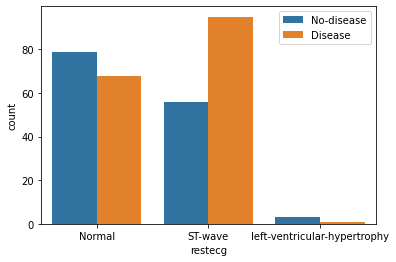

In [74]:
#to visualize the restcg categories wrt target
sns.countplot( x = 'restecg', hue = 'target',data =df)
plt.legend(labels = ['No-disease','Disease'])
plt.xticks([0,1,2],['Normal','ST-wave','left-ventricular-hypertrophy'])
plt.show()

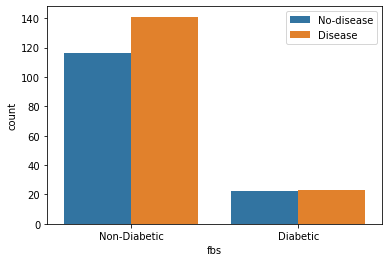

In [75]:
#to visualize  no.of diabetic_case related to the target
sns.countplot( x = 'fbs', hue = 'target',data =df)
plt.legend(labels = ['No-disease','Disease'])
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.show()

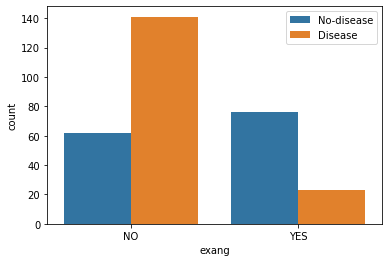

In [76]:
# to visualize the no.of excercise induced angina wrt target
sns.countplot( x = 'exang', hue = 'target',data =df)
plt.legend(labels = ['No-disease','Disease'])
plt.xticks([0,1],['NO','YES'])
plt.show()

C:\Users\Javed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


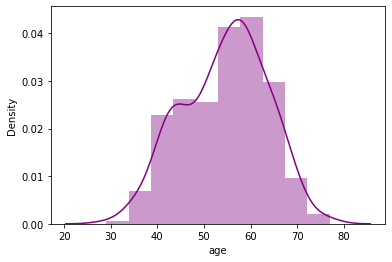

In [77]:
#to find the distribution of age within the dataset
sns.distplot(df.age, bins = 10 , color = 'purple')
plt.show()

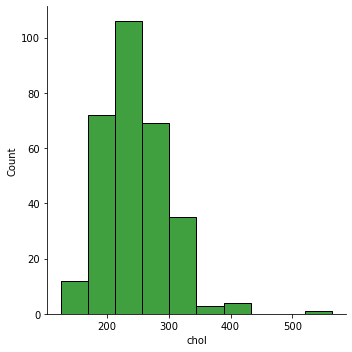

In [78]:
#to find the distribution of cholestral in the data
#df.chol.hist( figsize = (16,7))
sns.displot(df.chol, bins = 10, color ="g")
plt.show()

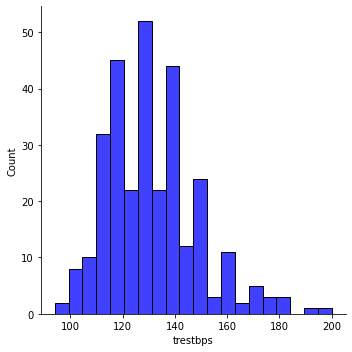

In [79]:
# to show the distribution of the resting blood pressure
sns.displot( df.trestbps , bins = 20 , color = "blue")
plt.show()

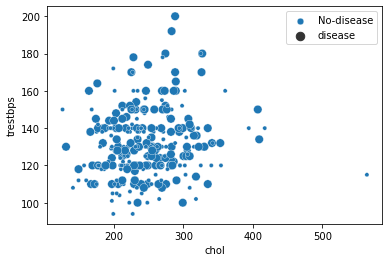

In [80]:
# to plot the continous varibles chol vs trestbps
sns.scatterplot(x = 'chol' , y = 'trestbps',data = df , size = "target")
plt.legend(labels = ['No-disease','disease'])
plt.show()

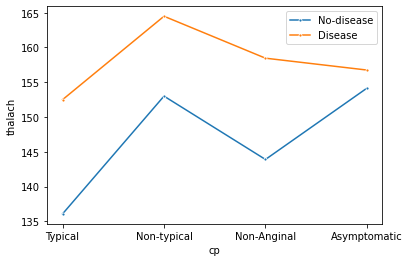

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported your DataFrame 'df'

sns.lineplot(x='cp', y='thalach', marker=".", color="orange", hue='target', data=df, ci=None)
plt.xticks([0, 1, 2, 3], ['Typical', 'Non-typical', 'Non-Anginal', 'Asymptomatic'])
plt.legend(labels=['No-disease', 'Disease'])
plt.show()


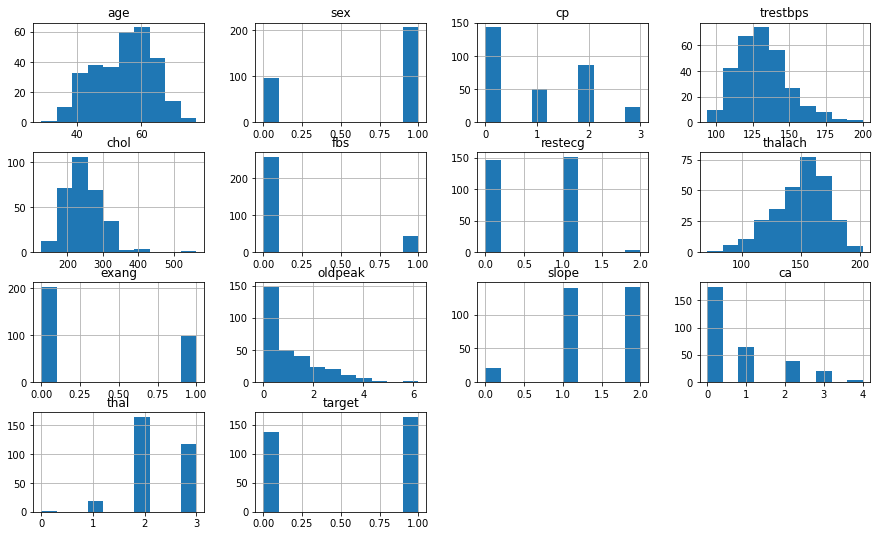

In [82]:
df.hist(figsize = (15,9))
plt.show()

In [83]:
#dataprosessing
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [84]:
data = pd.get_dummies(df,columns =['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [85]:
stdscale = StandardScaler()
columns = ['age','trestbps','chol','thalach','oldpeak']
data[columns] = stdscale.fit_transform(data[columns])

In [86]:
data.head(5)


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [87]:
x = data.drop(['target'],axis =1)
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-0.661712,-0.687083,-1.511859,0.394086,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,-1.346085,-2.041893,1.112172,-0.382092,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,-0.205463,0.164513,0.499898,-0.899544,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
843,0.506972,1.619532,0.512893,-1.074521,-0.899544,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [88]:
y= data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [89]:
#Here we are going to deal with three models
#1.K-N Neighbors
#2.Neive Baeyes
#3.decisiontree

# Splitting the data 

In [91]:
#1.K-N Neighbors

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [92]:
data.shape


(302, 31)

In [93]:
import math
neighbors = math.sqrt(302)
n = round(neighbors)
print(n)


17


# K Nearest Neighbors

In [99]:
knn_model = KNeighborsClassifier(n_neighbors = 17)
knn_model.fit(x_train,y_train)
y_predicted = knn_model.predict(x_test)
print(y_predicted)

[1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1]


In [100]:
accuracy_score(y_test,y_predicted)


0.8032786885245902

In [101]:
f1_score(y_test,y_predicted)


0.8421052631578948

In [102]:
confusion_matrix(y_test,y_predicted)


array([[17,  8],
       [ 4, 32]], dtype=int64)

In [103]:
accuracy_rate_of_CM = (17+32)/(17+32+8+4)
print("accuracy rate of confusion matrix: ",accuracy_rate_of_CM)

accuracy rate of confusion matrix:  0.8032786885245902


In [42]:
#Cross validation technique¶
knn1 =[]
knn_model1 = KNeighborsClassifier(n_neighbors = 17)
score = cross_val_score(knn_model1,x,y,cv = 10)
knn1.append(score.mean())
print(knn1) 

[0.8244086021505377]


In [43]:
knn2 =[]
for i in range(1,21):
    knn_model2 = KNeighborsClassifier(n_neighbors = i)
    score1 = cross_val_score(knn_model2,x,y,cv = 10)
    knn2.append(score1.mean())
print(knn2) 

[0.7448387096774194, 0.7746236559139785, 0.8011827956989247, 0.8044086021505377, 0.8310752688172043, 0.8278494623655913, 0.8411827956989247, 0.8344086021505376, 0.8377419354838709, 0.8309677419354837, 0.827741935483871, 0.827741935483871, 0.8213978494623655, 0.8211827956989246, 0.8246236559139785, 0.8178494623655913, 0.8244086021505377, 0.8210752688172043, 0.827741935483871, 0.8309677419354837]


In [44]:
a = max(knn2)
print( "Highest Accuracy got: ",a)

Highest Accuracy got:  0.8411827956989247


In [45]:
#Checking for Overfitting¶
#Thus while using 7 neighbors in this kNN model the highest accuracy is produced

In [46]:
knn3 =[]
knn_model3 = KNeighborsClassifier(n_neighbors = 7)
score = cross_val_score(knn_model3,x,y,cv = 10)
knn3.append(score.mean())
print(knn3)  

[0.8411827956989247]


In [47]:
recall_score1 = recall_score(y_test,y_predicted)
print(recall_score1)

0.8888888888888888


In [48]:
precision1 = precision_score(y_test,y_predicted)
print(precision1)

0.8


In [49]:
roc_score1 = roc_auc_score(y_test,y_predicted)
print(roc_score1)

0.7844444444444444


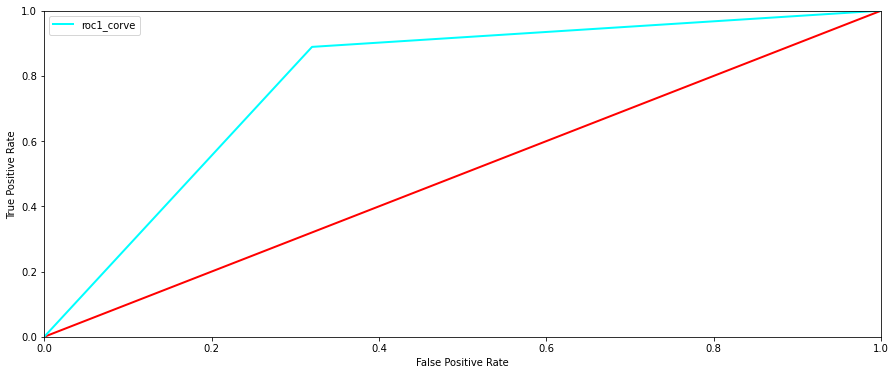

In [50]:
fpr,tpr,threshold = roc_curve(y_test,y_predicted)
plt.figure(figsize =(15,6))
plt.plot([0,1],[0,1], lw = 2, color ="r", linestyle = "-")
plt.plot(fpr,tpr,lw = 2, color = "cyan" ,label = "roc1_corve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

# Naive Bayes 

In [104]:
#Naive Baeyes¶

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)
print(y_pred)

[1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1]


In [105]:
accuracy_score(y_test,y_pred)


0.7868852459016393

In [106]:
f1_score(y_test,y_pred)


0.8219178082191781

In [107]:
confusion_matrix(y_test,y_pred)


array([[18,  7],
       [ 6, 30]], dtype=int64)

In [108]:
# Accuracy of this confusion matrix
accuracy_cm = (18+30)/(6+7+18+30)
print(" The Accuracy rate of cm in Naive Baeyes is : ",accuracy_cm)


 The Accuracy rate of cm in Naive Baeyes is :  0.7868852459016393


In [109]:
#To check the precission of the naive baeys¶
precision_2 = precision_score(y_test,y_pred)
print(precision_2)

0.8108108108108109


In [110]:
recall_2 = recall_score(y_test,y_pred)
print(recall_2)

0.8333333333333334


In [111]:
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.7766666666666667


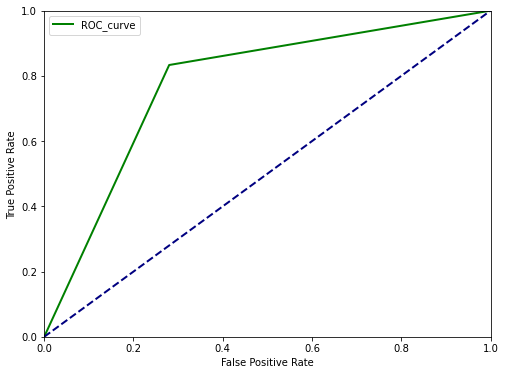

In [59]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,lw =2, color ="green", label = "ROC_curve")
plt.plot([0,1],[0,1], lw =2 , color ="navy",linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

In [60]:
#cross validating the Naive Baeyes Model¶
cross_score = cross_val_score(NB,x,y,cv =10)
print(cross_score)
print(cross_score.mean())

[0.70967742 0.90322581 0.8        0.93333333 0.9        1.
 0.8        0.66666667 0.76666667 0.83333333]
0.8312903225806452


# Decision Tree Classifier 

In [61]:
dc = DecisionTreeClassifier(max_leaf_nodes = 15, random_state = 0)
dc.fit(x_train,y_train)
y_p = dc.predict(x_test)
print(y_p)

[1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1]


In [62]:
ac_score = accuracy_score(y_test,y_p) 
print(ac_score)

0.6721311475409836


In [63]:
f1_score(y_test,y_p)


0.7058823529411765

In [64]:
confusion_matrix(y_test,y_p)


array([[17,  8],
       [12, 24]], dtype=int64)

In [65]:
#accuracy of this confusion matrix
a =(17+24)/(17+24+8+12)
print(a)

0.6721311475409836


In [66]:
precision_score(y_test,y_p)


0.75

In [67]:
recall_score(y_test,y_p)


0.6666666666666666

In [68]:
roc_auc_score(y_test,y_p)


0.6733333333333332

In [69]:
dc1 = DecisionTreeClassifier( max_leaf_nodes = 10, random_state = 0)
score3 = cross_val_score(dc1,x,y,cv =10)
print(score3)  

[0.80645161 0.74193548 0.76666667 0.6        0.83333333 0.93333333
 0.73333333 0.7        0.76666667 0.66666667]


In [70]:
print(score3.mean())


0.7548387096774194


# #Comparing of Accuracies of the three different models¶


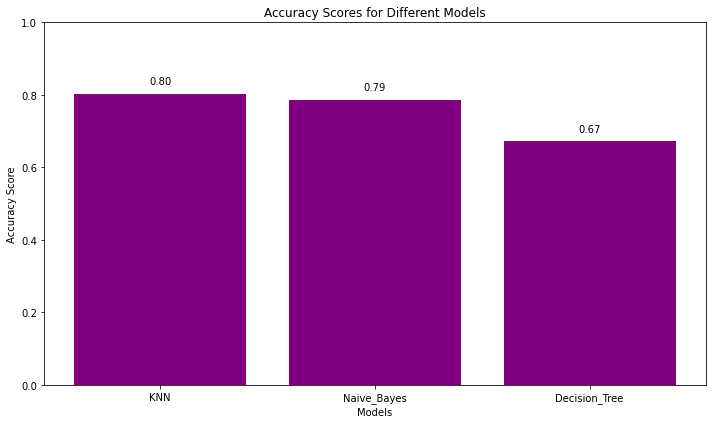

In [112]:

models = ["KNN","Naive_Bayes","Decision_Tree"]
accuracies =[0.8032786885245902,0.7868852459016393,0.6721311475409836]
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(models, accuracies, color='purple')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)
for i, score in enumerate(accuracies):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()